# **Exploratory Data Analysis on the Titanic Dataset**

<span style= "font-size:20px">Exploratory data analysis (EDA) is a step in data science that aims to understand a data's structure,visualize the data, identify crucial features, discover patterns and prepare it for further analysis or work like model training.</span>
   
  <span style= "font-size:20px">In this notebook, I want to use the popular titanic dataset to explain some of the basic processes in EDA. The dataset is based on the real-life tragedy of the RMS Titanic, which sank on April 15, 1912, after hitting an iceberg during its maiden voyage from Southampton to New York. Of the 2,224 passengers and crew aboard, more than 1,500 lost their lives. It can be downloaded from the [Kaggle](https://www.kaggle.com/datasets) dataset website. But in this place, I loaded the dataset from the Seaborn library.</span>

### Let's Get started!

In [65]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# We normally use 'df' as a default variable name when working with datasets. You can use whatever you want.
# Load Titanic dataset
df = sns.load_dataset('titanic')

# Check shape and first few rows
print(df.shape)
df.head() # shows the first five rows of the dataset
#df.head(7) # to view the first seven rows

(891, 15)


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [66]:
# Data info
df.info()

# Statistical summary (only numeric columns)
df.describe()
# to check for missing values
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.6+ KB


survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [67]:
# Before cleaning, Let's identify column types
# Separate columns by data type
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_cols = df.select_dtypes(include=['object', 'category', 'bool']).columns.tolist()

print("Numerical Columns:", numerical_cols)
print("Categorical Columns:", categorical_cols)

Numerical Columns: ['survived', 'pclass', 'age', 'sibsp', 'parch', 'fare']
Categorical Columns: ['sex', 'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town', 'alive', 'alone']


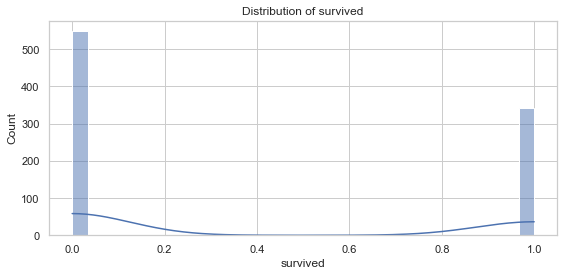

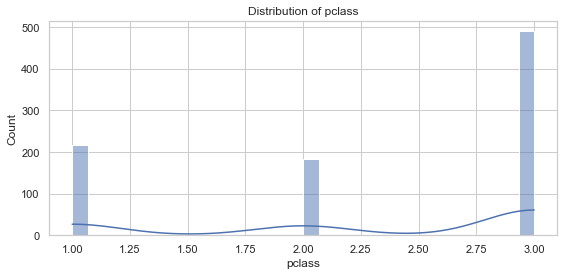

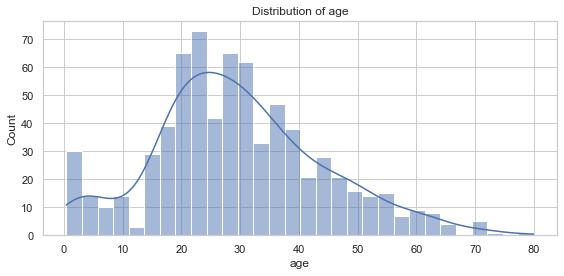

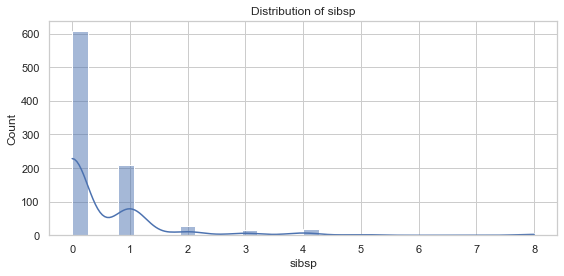

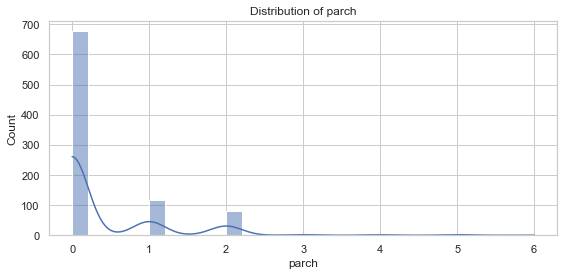

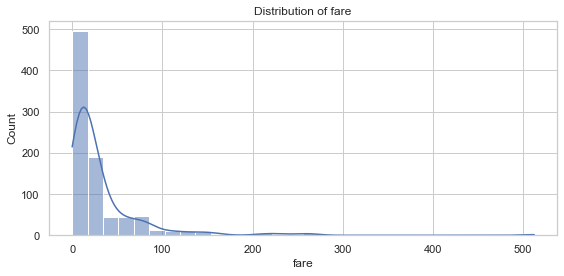

In [68]:
# DISTRIBUTION PLOT
numeric_cols = df.select_dtypes(include='number').columns
#print(numeric_cols)

sns.set(style="whitegrid")

# Create plots
for col in numeric_cols:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[col].dropna(), kde=True, bins=30)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.tight_layout()
    plt.show()


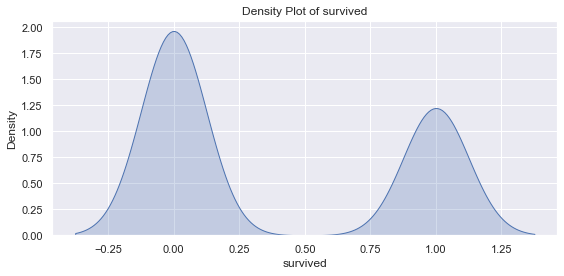

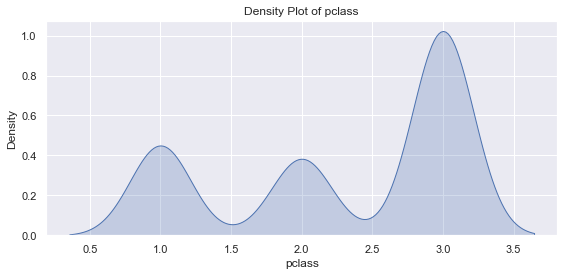

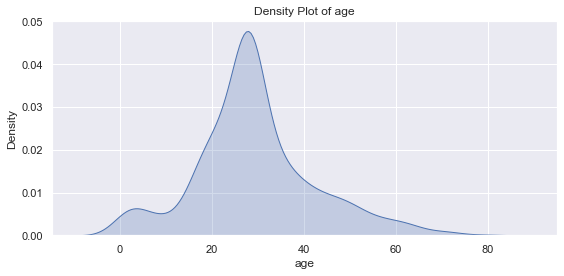

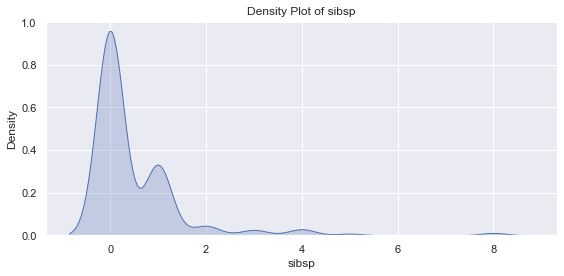

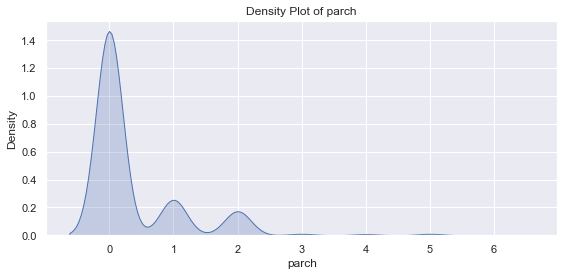

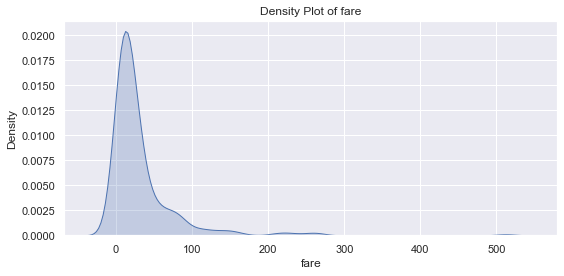

In [121]:
# WITHOUT THE HISTOGRAM
sns.set(style="darkgrid")
for col in numeric_cols:
    plt.figure(figsize=(8, 4))
    sns.kdeplot(df[col].dropna(), fill=True)
    plt.title(f'Density Plot of {col}')
    plt.xlabel(col)
    plt.ylabel('Density')
    plt.tight_layout()
    plt.show()


📊 Analyzing Numerical Column: survived
count    891.000000
mean       0.383838
std        0.486592
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: survived, dtype: float64


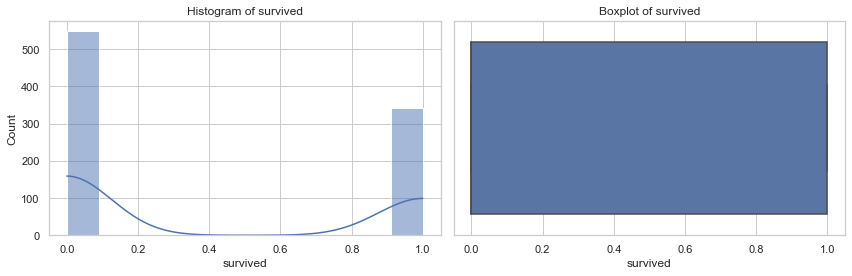


📊 Analyzing Numerical Column: pclass
count    891.000000
mean       2.308642
std        0.836071
min        1.000000
25%        2.000000
50%        3.000000
75%        3.000000
max        3.000000
Name: pclass, dtype: float64


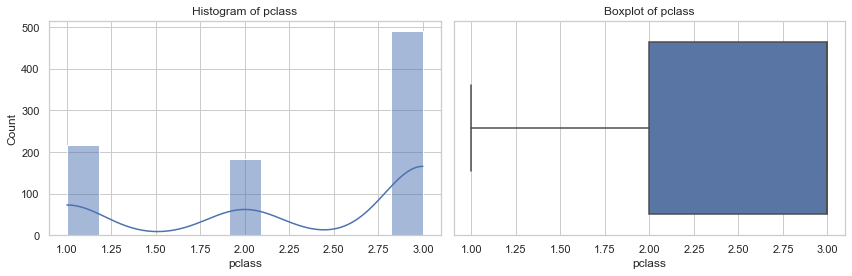


📊 Analyzing Numerical Column: age
count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: age, dtype: float64


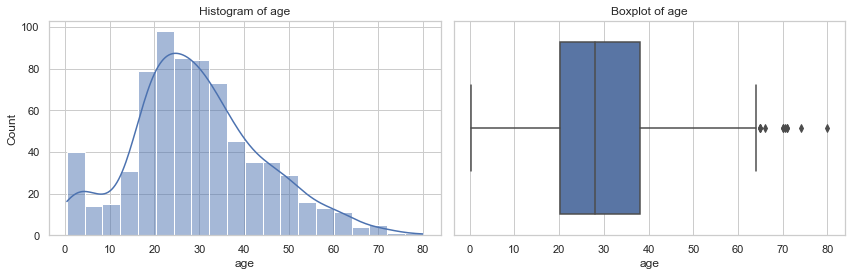


📊 Analyzing Numerical Column: sibsp
count    891.000000
mean       0.523008
std        1.102743
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        8.000000
Name: sibsp, dtype: float64


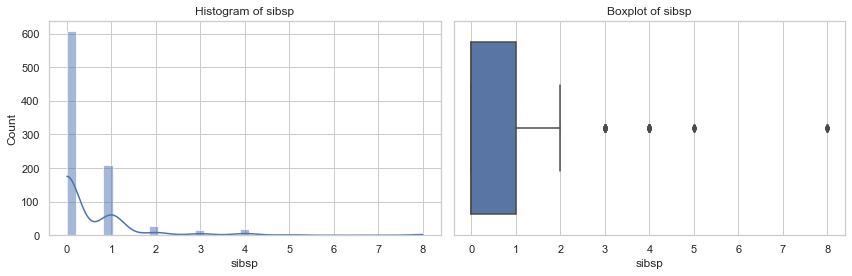


📊 Analyzing Numerical Column: parch
count    891.000000
mean       0.381594
std        0.806057
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        6.000000
Name: parch, dtype: float64


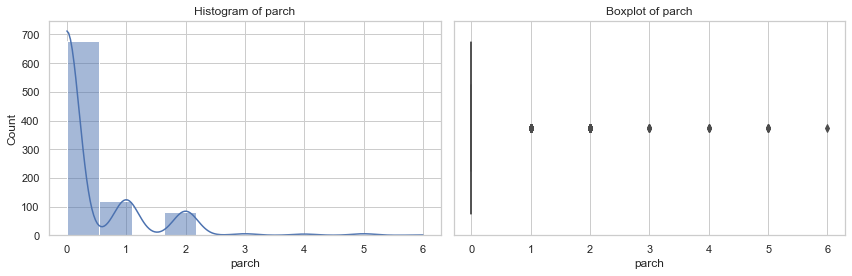


📊 Analyzing Numerical Column: fare
count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: fare, dtype: float64


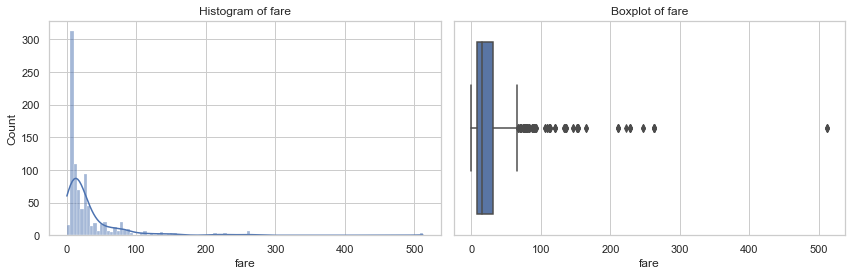

In [69]:
# Analyze the numerical columns
for col in numerical_cols:
    print(f"\n📊 Analyzing Numerical Column: {col}")
    print(df[col].describe())
    
    plt.figure(figsize=(12, 4))
    
    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(df[col].dropna(), kde=True)
    plt.title(f'Histogram of {col}')
    
    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    
    plt.tight_layout()
    plt.show()


📋 Analyzing Categorical Column: sex
male      577
female    314
Name: sex, dtype: int64

Proportions:
 male      0.647587
female    0.352413
Name: sex, dtype: float64


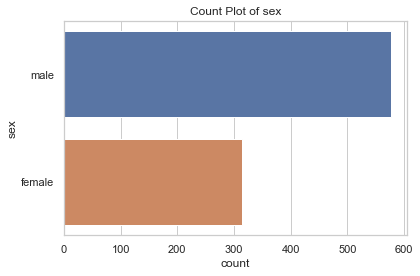


📋 Analyzing Categorical Column: embarked
S      644
C      168
Q       77
NaN      2
Name: embarked, dtype: int64

Proportions:
 S      0.722783
C      0.188552
Q      0.086420
NaN    0.002245
Name: embarked, dtype: float64


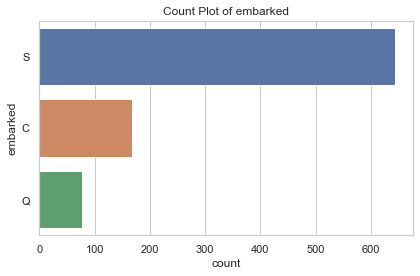


📋 Analyzing Categorical Column: class
Third     491
First     216
Second    184
Name: class, dtype: int64

Proportions:
 Third     0.551066
First     0.242424
Second    0.206510
Name: class, dtype: float64


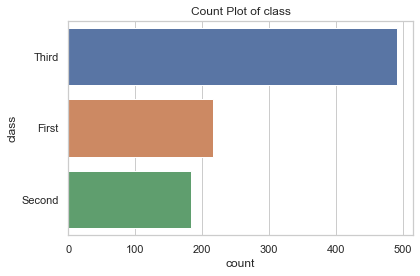


📋 Analyzing Categorical Column: who
man      537
woman    271
child     83
Name: who, dtype: int64

Proportions:
 man      0.602694
woman    0.304153
child    0.093154
Name: who, dtype: float64


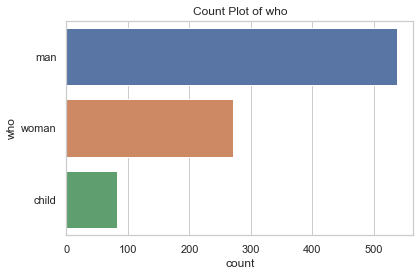


📋 Analyzing Categorical Column: adult_male
True     537
False    354
Name: adult_male, dtype: int64

Proportions:
 True     0.602694
False    0.397306
Name: adult_male, dtype: float64


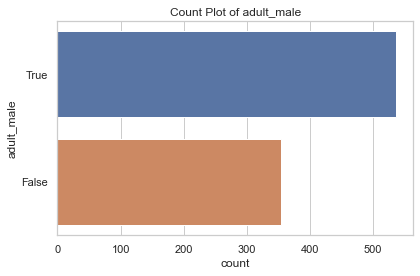


📋 Analyzing Categorical Column: deck
NaN    688
C       59
B       47
D       33
E       32
A       15
F       13
G        4
Name: deck, dtype: int64

Proportions:
 NaN    0.772166
C      0.066218
B      0.052750
D      0.037037
E      0.035915
A      0.016835
F      0.014590
G      0.004489
Name: deck, dtype: float64


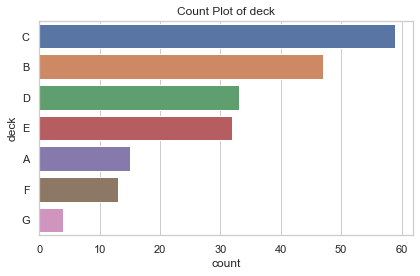


📋 Analyzing Categorical Column: embark_town
Southampton    644
Cherbourg      168
Queenstown      77
NaN              2
Name: embark_town, dtype: int64

Proportions:
 Southampton    0.722783
Cherbourg      0.188552
Queenstown     0.086420
NaN            0.002245
Name: embark_town, dtype: float64


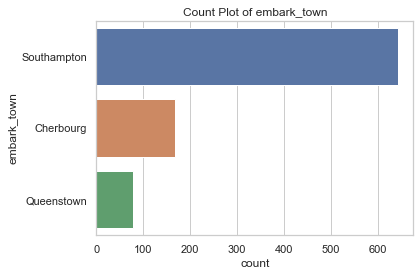


📋 Analyzing Categorical Column: alive
no     549
yes    342
Name: alive, dtype: int64

Proportions:
 no     0.616162
yes    0.383838
Name: alive, dtype: float64


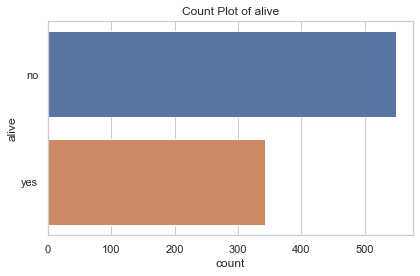


📋 Analyzing Categorical Column: alone
True     537
False    354
Name: alone, dtype: int64

Proportions:
 True     0.602694
False    0.397306
Name: alone, dtype: float64


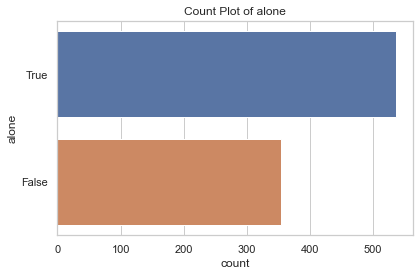

In [70]:
#Let's also analyze the categorical columns
for col in categorical_cols:
    print(f"\n📋 Analyzing Categorical Column: {col}")
    print(df[col].value_counts(dropna=False))
    print("\nProportions:\n", df[col].value_counts(normalize=True, dropna=False))
    
    plt.figure(figsize=(6, 4))
    sns.countplot(y=col, data=df, order=df[col].value_counts().index)
    plt.title(f'Count Plot of {col}')
    plt.tight_layout()
    plt.show()

In [71]:
#Missing Value Summary
# View missing data per column
print("\nMissing Values Summary:")
print(df.isnull().sum())


Missing Values Summary:
survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64


We've finished analyzing column by column

### Bivariate analysis, Distribution etc

Text(0.5, 1.0, 'Passenger Class Distribution')

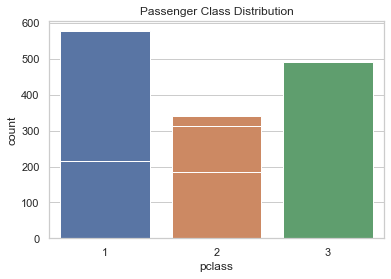

In [72]:
import matplotlib.pyplot as plt

# Count of survivors
sns.countplot(data=df, x='survived')
plt.title("Survival Count")

# Gender distribution
sns.countplot(data=df, x='sex')
plt.title("Gender Distribution")

# Passenger Class
sns.countplot(data=df, x='pclass')
plt.title("Passenger Class Distribution")

Text(0.5, 1.0, 'Fare Distribution')

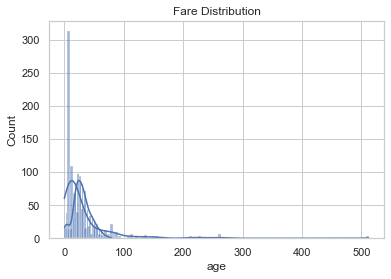

In [73]:
# Age distribution
sns.histplot(df['age'].dropna(), kde=True)
plt.title("Age Distribution")

# Fare distribution
sns.histplot(df['fare'], kde=True)
plt.title("Fare Distribution")

Text(0.5, 1.0, 'Survival by Gender')

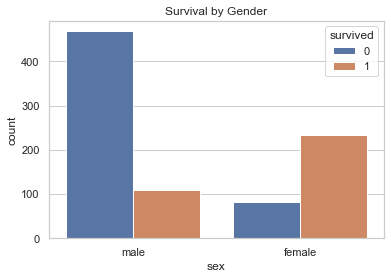

In [74]:
sns.countplot(data=df, x='sex', hue='survived')
plt.title("Survival by Gender")

Text(0.5, 1.0, 'Survival by Passenger Class')

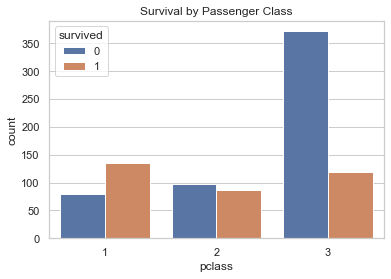

In [75]:
sns.countplot(data=df, x='pclass', hue='survived')
plt.title("Survival by Passenger Class")

Text(0.5, 1.0, 'Age Distribution by Survival')

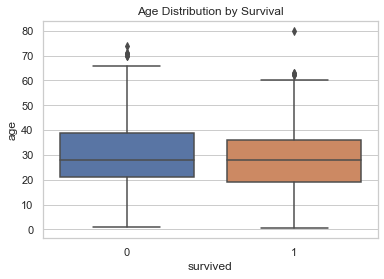

In [76]:
sns.boxplot(data=df, x='survived', y='age')
plt.title("Age Distribution by Survival")

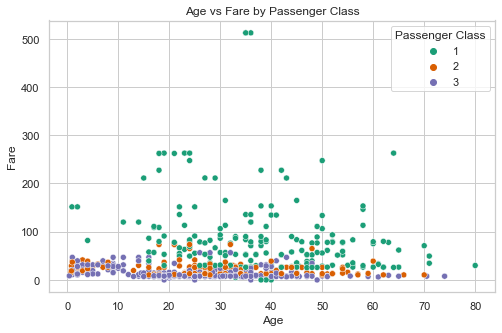

In [77]:
# Scatter plot: Age vs Fare
plt.figure(figsize=(8, 5))
sns.scatterplot(x='age', y='fare', data=df, hue='pclass', palette='Dark2')
plt.title('Age vs Fare by Passenger Class')
plt.xlabel('Age')
plt.ylabel('Fare')
plt.legend(title='Passenger Class')
plt.show()

Text(0.5, 1.0, 'Correlation Heatmap')

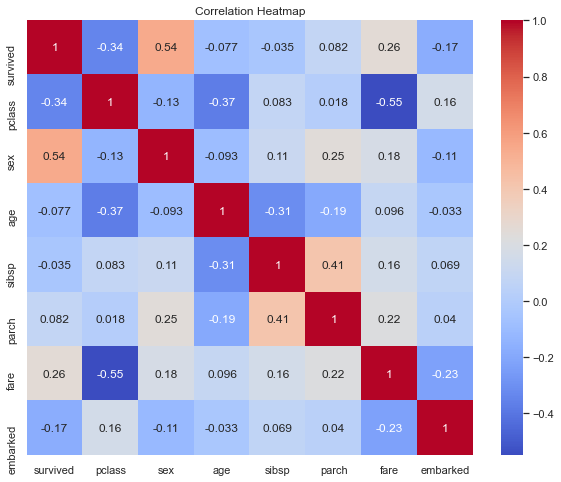

In [78]:
import numpy as np

# Convert categorical to numerical for correlation
df_corr = df.copy()
df_corr['sex'] = df_corr['sex'].map({'male': 0, 'female': 1})
df_corr['embarked'] = df_corr['embarked'].map({'C': 0, 'Q': 1, 'S': 2})
df_corr = df_corr.select_dtypes(include=np.number)

# Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df_corr.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")

#### Missing Data Analysis


<span style= "font-size:16px">There are different ways to handle missing values.
We can impute or drop them. Also note that choosing between mean, median, or mode for filling missing values isn’t random. It depends on the type of data, its distribution, and the context of your analysis. Mean is used when the data is numerical, the distribution is roughly symmetric and outliers are not a major concern. Median is used when the distribution is skewed and you want to reduce the influence of outliers. Mode on the other hand is used when the data is categorical and you want to fill with the most frequent value.</span>

In [79]:
# Check missing again
df.isnull().sum()

# Fill missing 'age' with median
df['age'].fillna(df['age'].median(), inplace=True) #impute numerical column

# Fill 'embarked' with mode
df['embarked'].fillna(df['embarked'].mode()[0], inplace=True) # impute categorical column

# Drop 'deck' due to too many missing values
#df.drop(columns='deck', inplace=True)
df.head(12)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
5,0,3,male,28.0,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
7,0,3,male,2.0,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False
8,1,3,female,27.0,0,2,11.1333,S,Third,woman,False,NaN,Southampton,yes,False
9,1,2,female,14.0,1,0,30.0708,C,Second,child,False,NaN,Cherbourg,yes,False


In [80]:
# Total missing values per column
#Overview of missing data
missing_counts = df.isnull().sum()
missing_percent = (missing_counts / len(df)) * 100

missing_df = pd.DataFrame({
    'Missing Count': missing_counts,
    'Missing %': missing_percent
})

missing_df = missing_df[missing_df['Missing Count'] > 0].sort_values(by='Missing %', ascending=False)
print(missing_df)

             Missing Count  Missing %
deck                   688  77.216611
embark_town              2   0.224467


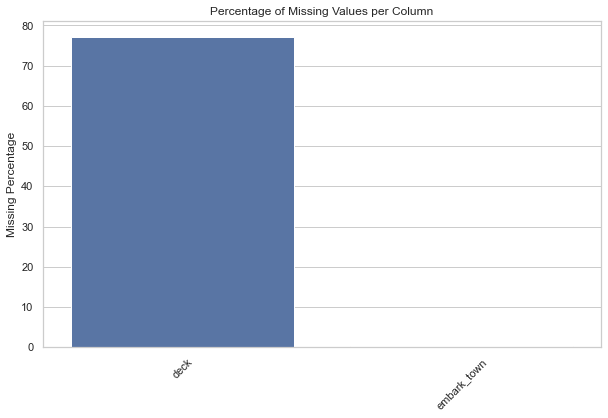

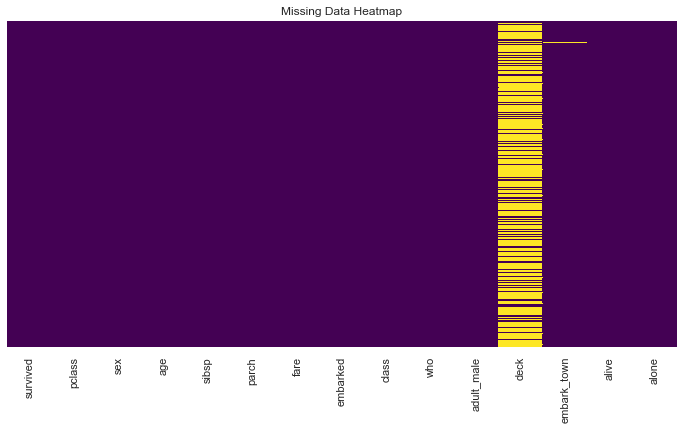

In [81]:
# Visualising missing data
plt.figure(figsize=(10, 6))
sns.barplot(x=missing_df.index, y=missing_df['Missing %'])
plt.title('Percentage of Missing Values per Column')
plt.ylabel('Missing Percentage')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(12, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis', yticklabels=False)
plt.title('Missing Data Heatmap')
plt.show()

In [82]:
# To see which row has multiple missing data
df['missing_per_row'] = df.isnull().sum(axis=1)
df['missing_per_row'].value_counts().sort_index()

0    201
1    690
Name: missing_per_row, dtype: int64

In [83]:
# We are going to drop columns with two much missing data
threshold = 0.5
cols_to_drop = missing_df[missing_df['Missing %'] > threshold * 100].index.tolist() #drops any column that has more than 50% missing data
df = df.drop(columns=cols_to_drop)

In [84]:
#df.head()
#drop the temporary column we added
# Only drop 'missing_per_row' if it exists
if 'missing_per_row' in df.columns:
    df.drop(columns='missing_per_row', inplace=True)

df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,Southampton,no,True


### Outlier detection and Visualisation

In [85]:
# Select only numeric columns
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
print(numeric_cols)

Index(['survived', 'pclass', 'age', 'sibsp', 'parch', 'fare'], dtype='object')


Boxplot is a standard way to detect outliers visually

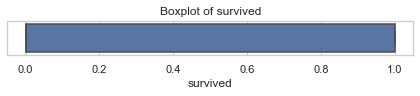

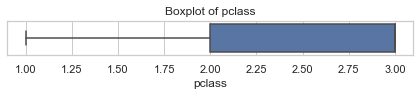

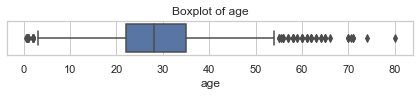

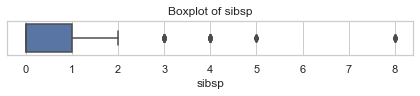

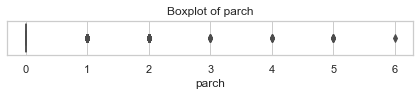

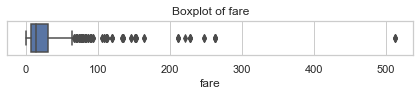

In [86]:
import matplotlib.pyplot as plt
import seaborn as sns

# Boxplots for each numeric column
for col in numeric_cols:
    plt.figure(figsize=(6, 1.5))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.tight_layout()
    plt.show()

Z-score or interquartile range (IQR) can also be used for outlier detection

In [87]:
#using IQR
def detect_outliers_iqr(data, col):
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[col] < lower_bound) | (data[col] > upper_bound)]
    return outliers

# Example: Detect outliers in 'fare'
outliers_fare = detect_outliers_iqr(df, 'fare')
print(f"Number of outliers in 'fare': {outliers_fare.shape[0]}")
outliers_fare[['fare']]

Number of outliers in 'fare': 116


,fare
1,71.2833
27,263.0000
31,146.5208
34,82.1708
52,76.7292
...,...
846,69.5500
849,89.1042
856,164.8667
863,69.5500


***An outlier doesn't necessarily mean it's not supposed to be in a dataset. Outliers are just data points that are significantly high or low compared to others.***

***Consider the context carefully***

Let's visualise the outliers

C:\Users\user\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 28.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\user\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 62.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\user\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 81.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


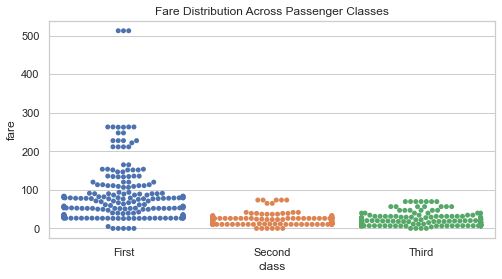

In [88]:
# Swarmplot with 'fare' and 'class'
plt.figure(figsize=(8, 4))
sns.swarmplot(x='class', y='fare', data=df)
plt.title('Fare Distribution Across Passenger Classes')
plt.show()

Note that Swarmplots are dense for large datasets. Use stripplot with jitter for faster plots.

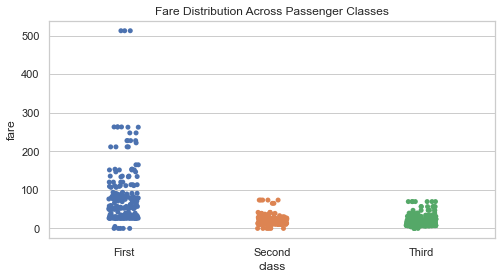

In [89]:
# Stripplot with 'fare' and 'class'
plt.figure(figsize=(8, 4))
sns.stripplot(x='class', y='fare', data=df, jitter=True)
plt.title('Fare Distribution Across Passenger Classes')
plt.show()

In [90]:
# Now let's apply IQR-Based Outlier Detection to All numeric columns
def detect_outliers_iqr(data, col):
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[col] < lower_bound) | (data[col] > upper_bound)]
    return outliers

def summarize_outliers(df, numeric_cols):
    summary = {}
    for col in numeric_cols:
        outliers = detect_outliers_iqr(df, col)
        summary[col] = len(outliers)
    return pd.Series(summary).sort_values(ascending=False)

numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
print("Number of outliers per numeric column:")
outlier_summary = summarize_outliers(df, numeric_cols)
print(outlier_summary)

Number of outliers per numeric column:
parch       213
fare        116
age          66
sibsp        46
pclass        0
survived      0
dtype: int64


### Correlation Analysis

There are different types of correlation analysis used to check for the relationship between variables, e.g Pearson, Spearman etc. We eon't dig into much details here. Due to the nature of the titanic dataset, the spearman correlation is the best.

##### USING THE PEARSON CORRELATION

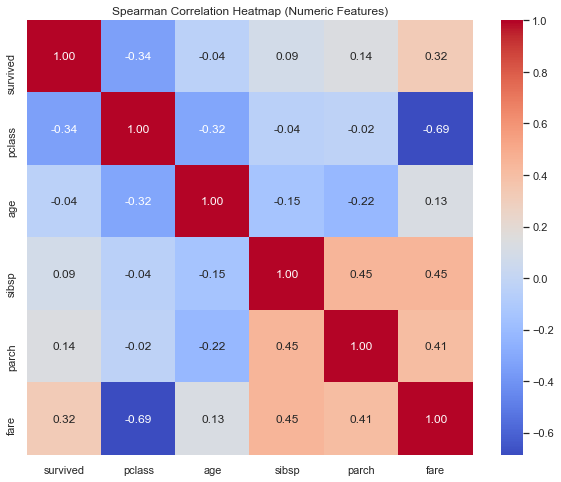

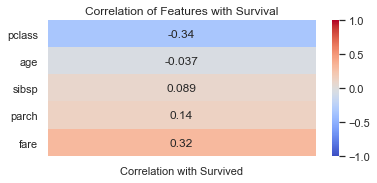

In [91]:
#Numerical correlation only
numeric_cols = df.select_dtypes(include=['int64', 'float64']) # Select only numeric columns

# Compute Spearman correlation
corr_spearman = numeric_cols.corr(method='spearman')

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_spearman, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Spearman Correlation Heatmap (Numeric Features)")
plt.show()

# TARGET CORRELATION WITH SURVIVED
# Extract correlation with 'survived'
corr_with_target = corr_spearman['survived'].drop('survived')  # Drop self-correlation

# Convert to DataFrame for heatmap
target_corr_df = corr_with_target.to_frame(name='Correlation with Survived')

# Plot the heatmap
plt.figure(figsize=(6, len(target_corr_df) * 0.5))  # Adjust height based on number of features
sns.heatmap(target_corr_df, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation of Features with Survival')
plt.show()

##### USING THE PEARSON CORRELATION

In [92]:
# Select only numerical columns
numeric_df = df.select_dtypes(include=['int64', 'float64'])
numeric_df.head()

,survived,pclass,age,sibsp,parch,fare
0,0,3,22.0,1,0,7.2500
1,1,1,38.0,1,0,71.2833
2,1,3,26.0,0,0,7.9250
3,1,1,35.0,1,0,53.1000
4,0,3,35.0,0,0,8.0500


In [93]:
# Correlation matrix
corr_matrix = numeric_df.corr()
corr_matrix
# Compute the Pearson correlation by default

,survived,pclass,age,sibsp,parch,fare
survived,1.000000,-0.338481,-0.064910,-0.035322,0.081629,0.257307
pclass,-0.338481,1.000000,-0.339898,0.083081,0.018443,-0.549500
age,-0.064910,-0.339898,1.000000,-0.233296,-0.172482,0.096688
sibsp,-0.035322,0.083081,-0.233296,1.000000,0.414838,0.159651
parch,0.081629,0.018443,-0.172482,0.414838,1.000000,0.216225
fare,0.257307,-0.549500,0.096688,0.159651,0.216225,1.000000


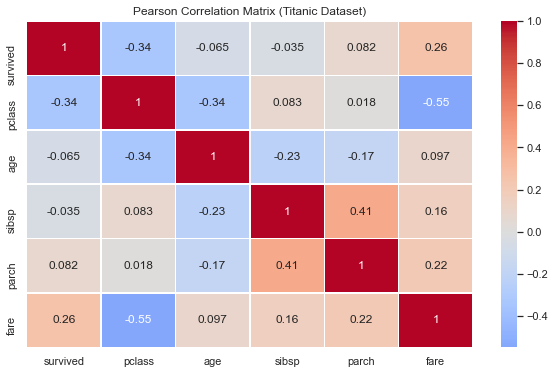

In [94]:
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, linewidths=0.5)
plt.title('Pearson Correlation Matrix (Titanic Dataset)')
plt.show()

In [95]:
# Target correlation: Sort correlation of all variables with a single variable (e.g survived)
# Correlation of all numeric features with the target
corr_with_target = corr_matrix['survived'].sort_values(ascending=False)
print(corr_with_target)

survived    1.000000
fare        0.257307
parch       0.081629
sibsp      -0.035322
age        -0.064910
pclass     -0.338481
Name: survived, dtype: float64


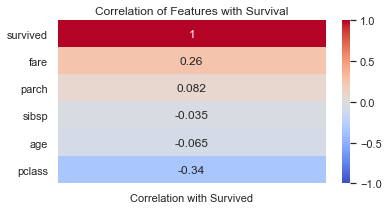

In [96]:
# We have to reshape the Series into a DataFrame
target_corr_df = corr_with_target.to_frame(name='Correlation with Survived')

# Plot the heatmap
plt.figure(figsize=(6, len(target_corr_df) * 0.5))  # Adjust height based on number of features
sns.heatmap(target_corr_df, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation of Features with Survival')
plt.show()

### Correlation for Categorical variables

We are gpoing to use Cramér’s V for this type of correlation
This is great for computing strength of association between two categorical variables.

In [97]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency

# define the Cramér’s V function

def cramers_v(confusion_matrix):
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))    
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))

In [98]:
# We are going to need to compute Cramér’s V for all categorical pairs
# Select categorical features
cat_cols = df.select_dtypes(include='category').columns.tolist()

# Create empty DataFrame to hold results
cramers_results = pd.DataFrame(index=cat_cols, columns=cat_cols)

# Compute Cramér’s V for each pair
for col1 in cat_cols:
    for col2 in cat_cols:
        if col1 == col2:
            cramers_results.loc[col1, col2] = 1.0
        else:
            confusion_mat = pd.crosstab(df[col1], df[col2])
            cramers_results.loc[col1, col2] = cramers_v(confusion_mat)

# Convert all to float
cramers_results = cramers_results.astype(float)

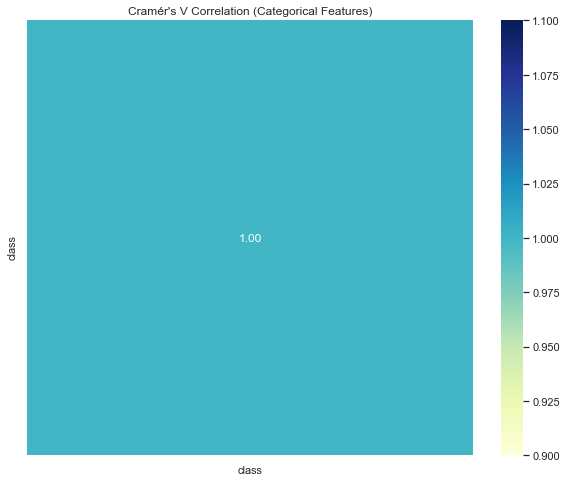

In [99]:
#Let's visualise
plt.figure(figsize=(10, 8))
sns.heatmap(cramers_results, annot=True, cmap='YlGnBu', fmt=".2f")
plt.title("Cramér's V Correlation (Categorical Features)")
plt.show()

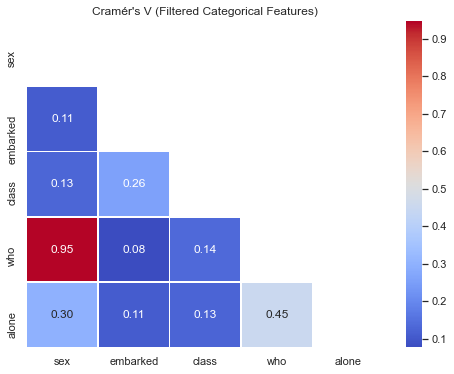

In [100]:
import numpy as np

# Select cleaned list
filtered_cat_cols = ['sex', 'embarked', 'class', 'who', 'alone']
cramers_results = pd.DataFrame(index=filtered_cat_cols, columns=filtered_cat_cols)

# Calculate Cramér’s V
for col1 in filtered_cat_cols:
    for col2 in filtered_cat_cols:
        if col1 == col2:
            cramers_results.loc[col1, col2] = 1.0
        else:
            confusion_mat = pd.crosstab(df[col1], df[col2])
            cramers_results.loc[col1, col2] = cramers_v(confusion_mat)


cramers_results = cramers_results.astype(float) # to convert to float

# Plot with mask
mask = np.triu(np.ones_like(cramers_results, dtype=bool))

plt.figure(figsize=(8, 6))
sns.heatmap(cramers_results, annot=True, cmap='coolwarm', mask=mask, fmt=".2f", linewidths=0.5)
plt.title("Cramér's V (Filtered Categorical Features)")
plt.show()

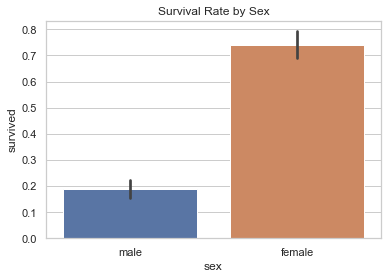

In [101]:
sns.barplot(data=df, x='sex', y='survived')
plt.title('Survival Rate by Sex')
plt.show()

### Feature Engineering

<span style= "font-size:18px">Feature engineering in EDA is the process of transforming raw data into meaningful features that gives new insights to the data and also enhance the performance for machine learning models while we're still exploring and understanding the data.</span>

In [102]:
# Family size: By combining sibsp (siblings/spouses) and parch (parents/children)
df['family_size'] = df['sibsp'] + df['parch'] + 1

# Is alone
df['is_alone'] = (df['family_size'] == 1).astype(int) # A binary feature from family_size

# Age binning
df['age_bin'] = pd.cut(df['age'], bins=[0, 12, 18, 35, 60, 100], 
                            labels=['child', 'teen', 'young_adult', 'adult', 'senior'])

# Fare binning
df['fare_bin'] = pd.qcut(df['fare'], 4, labels=['low', 'mid', 'high', 'very_high'])

# Log transform fare
df['fare_log'] = df['fare'].apply(lambda x: np.log(x + 1))

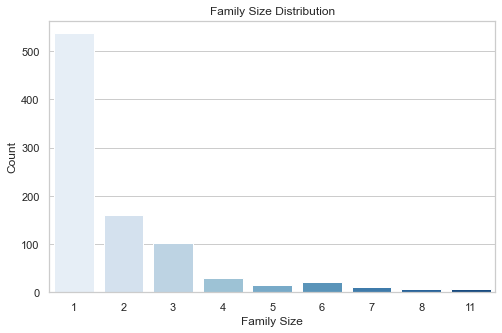

In [103]:
# Family Size Distribution
plt.figure(figsize=(8, 5))
sns.countplot(x='family_size', data=df, palette='Blues')
plt.title('Family Size Distribution')
plt.xlabel('Family Size')
plt.ylabel('Count')
plt.show()

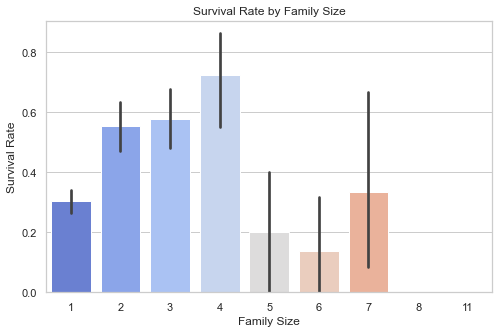

In [104]:
# Survival rate by Family Size
plt.figure(figsize=(8, 5))
sns.barplot(x='family_size', y='survived', data=df, palette='coolwarm')
plt.title('Survival Rate by Family Size')
plt.xlabel('Family Size')
plt.ylabel('Survival Rate')
plt.show()

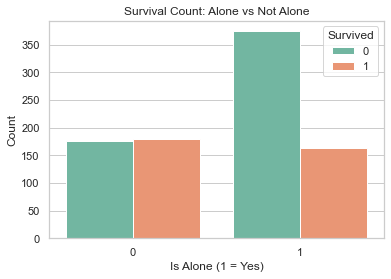

In [105]:
# Is Alone vs Survival
plt.figure(figsize=(6, 4))
sns.countplot(x='is_alone', hue='survived', data=df, palette='Set2')
plt.title('Survival Count: Alone vs Not Alone')
plt.xlabel('Is Alone (1 = Yes)')
plt.ylabel('Count')
plt.legend(title='Survived')
plt.show()

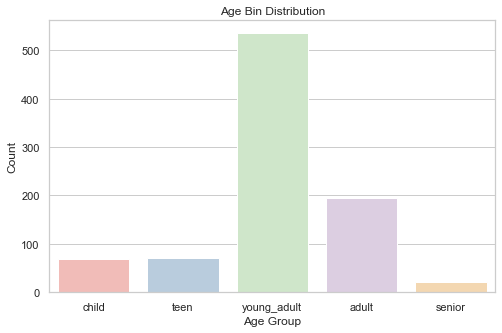

In [106]:
# Age Bin Distribution
plt.figure(figsize=(8, 5))
sns.countplot(x='age_bin', data=df, palette='Pastel1')
plt.title('Age Bin Distribution')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.show()

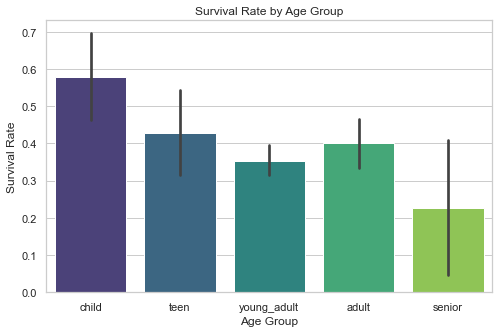

In [107]:
# Survival rate by Age bin
plt.figure(figsize=(8, 5))
sns.barplot(x='age_bin', y='survived', data=df, palette='viridis')
plt.title('Survival Rate by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Survival Rate')
plt.show()

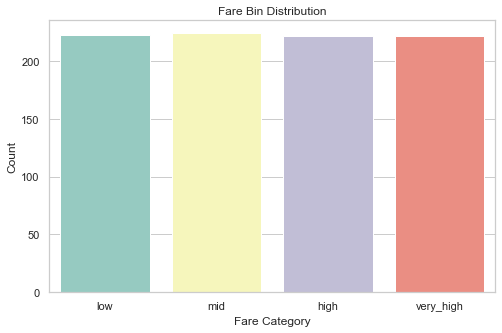

In [108]:
# Fare Bin Distribution
plt.figure(figsize=(8, 5))
sns.countplot(x='fare_bin', data=df, palette='Set3')
plt.title('Fare Bin Distribution')
plt.xlabel('Fare Category')
plt.ylabel('Count')
plt.show()

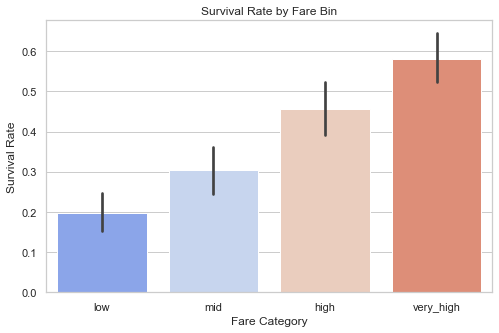

In [109]:
# Survival rate by Fare Bin
plt.figure(figsize=(8, 5))
sns.barplot(x='fare_bin', y='survived', data=df, palette='coolwarm')
plt.title('Survival Rate by Fare Bin')
plt.xlabel('Fare Category')
plt.ylabel('Survival Rate')
plt.show()

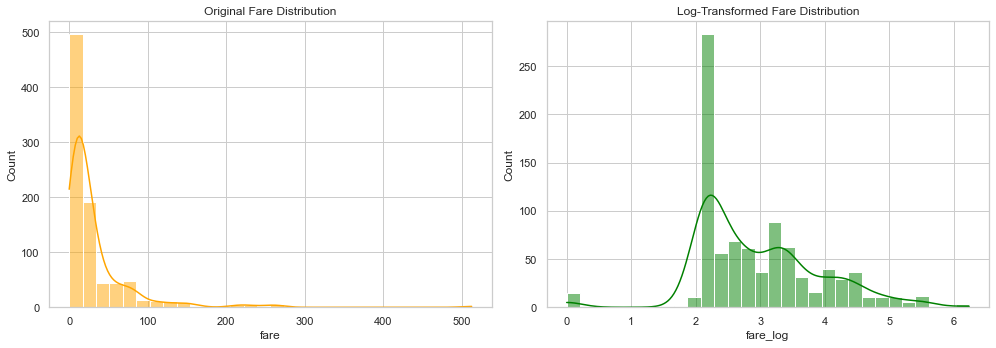

In [110]:
# Fare Distribution (Original vs Log Transformed)
fig, axs = plt.subplots(1, 2, figsize=(14, 5))

sns.histplot(df['fare'], bins=30, kde=True, ax=axs[0], color='orange')
axs[0].set_title('Original Fare Distribution')

sns.histplot(df['fare_log'], bins=30, kde=True, ax=axs[1], color='green')
axs[1].set_title('Log-Transformed Fare Distribution')

plt.tight_layout()
plt.show()

#### For modeling, convert strings to numbers. Or use Label Encoding if the variable is ordinal.